# Importing libraries


In [16]:
import numpy as np
import pandas as pd
# import pandas_datareader as web
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
import os


# Importing dataset using source yahoo

In [57]:
# df=web.DataReader('AAPL',data_source='yahoo',start='2014-08-19', end='2020-06-22')

# import yfinance as yf                                   # if pandas_datareader is not working
# data = yf.download('AAPL', start = '2012-01-01', end='2017-01-01')

df=pd.read_csv('GOOG.csv')

In [58]:
# df=pd.read_csv('GOOG.csv',date_parser=True)
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1286,2019-09-27,1243.010010,1244.020020,1214.449951,1225.089966,1225.089966,1353900
1287,2019-09-30,1220.969971,1226.000000,1212.300049,1219.000000,1219.000000,1404100
1288,2019-10-01,1219.000000,1231.229980,1203.579956,1205.099976,1205.099976,1273500
1289,2019-10-02,1196.979980,1196.979980,1171.290039,1176.630005,1176.630005,1615100
1290,2019-10-03,1180.000000,1189.060059,1162.430054,1187.829956,1187.829956,1621200


In [59]:
# Preprocessing and feature extraction

In [60]:
df=df['Open'].values
df=df.reshape(-1,1)
print(df.shape)
df[:5]


(1291, 1)


array([[583.398254],
       [584.275879],
       [582.221497],
       [581.992126],
       [583.119019]])

# Spliting dataset into training and testing

In [61]:
dataset_train=np.array(df[:int(df.shape[0]*0.8)])
dataset_test= np.array(df[int(df.shape[0]*0.8)-50:])

print(df.shape)
print(dataset_train.shape)
print(dataset_test.shape)

(1291, 1)
(1032, 1)
(309, 1)


In [62]:
# Now  Normilizing

In [63]:
scaler= MinMaxScaler(feature_range=(0,1))
dataset_train=scaler.fit_transform(dataset_train)
dataset_train[:5]

array([[0.11585714],
       [0.11698562],
       [0.11434402],
       [0.11404909],
       [0.11549809]])

In [64]:
dataset_test=scaler.transform(dataset_test)
dataset_test[:5]

array([[0.88941813],
       [0.89506297],
       [0.87298511],
       [0.90428247],
       [0.89713315]])

In [65]:
def creat_dataset(df):
    x=[]
    y=[]
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i,0])
        y.append(df[i,0])
        
    x=np.array(x)
    y=np.array(y)
    
    return x,y
        

In [66]:
x_train, y_train= creat_dataset(dataset_train)
x_train[:1]

array([[0.11585714, 0.11698562, 0.11434402, 0.11404909, 0.11549809,
        0.11106131, 0.10594489, 0.09605822, 0.0983279 , 0.09899475,
        0.10944562, 0.10944562, 0.11454917, 0.11790887, 0.1208582 ,
        0.11136904, 0.10990724, 0.11072792, 0.10039242, 0.10016161,
        0.10945841, 0.11842183, 0.12419223, 0.12716722, 0.11822947,
        0.11131779, 0.11912706, 0.10439331, 0.09886651, 0.10550892,
        0.10432919, 0.09317302, 0.10053353, 0.10790684, 0.10226467,
        0.0909418 , 0.09813554, 0.08087564, 0.06455171, 0.05674244,
        0.04662496, 0.03122437, 0.04180347, 0.01897828, 0.03916187,
        0.04518876, 0.05728098, 0.06374391, 0.05434453, 0.06199998]])

In [67]:
x_test, y_test= creat_dataset(dataset_test)
x_test[:1]

array([[0.88941813, 0.89506297, 0.87298511, 0.90428247, 0.89713315,
        0.89193832, 0.88428766, 0.98918608, 0.95902042, 0.97428329,
        1.        , 0.94472194, 0.93443525, 0.94470907, 0.91629213,
        0.94679211, 0.94085156, 0.95628159, 0.9607434 , 0.9728689 ,
        0.9639966 , 0.95625584, 0.95395415, 0.94632923, 0.94050436,
        0.91131595, 0.91516059, 0.91899235, 0.90870567, 0.91788655,
        0.92004667, 0.9441947 , 0.96179787, 0.95686015, 0.96557815,
        0.95368417, 0.91419621, 0.90073355, 0.89108978, 0.85556213,
        0.8729465 , 0.85936816, 0.87362803, 0.8710821 , 0.88183167,
        0.87031063, 0.85353041, 0.86367568, 0.88297608, 0.89841898]])

# Now Reshapping Feature for LSTM model

In [68]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

print(x_train.shape)
print(x_test.shape)

(982, 50, 1)
(259, 50, 1)


# Building Moel

In [69]:
model= Sequential()

model.add( LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add( LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))

model.add( LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=96))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(loss='mean_squared_error', optimizer='adam')


# Model saving for future use

In [70]:
if( not os.path.exists('stock-prediction.h5')):
    model.fit(x_train,y_train, epochs=50, batch_size=32)
    model.save('stock-prediction.h5')

In [71]:
model=load_model('stock-prediction.h5')

# Visualization

In [72]:
predictions= model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [73]:
predictions.shape

(259, 1)

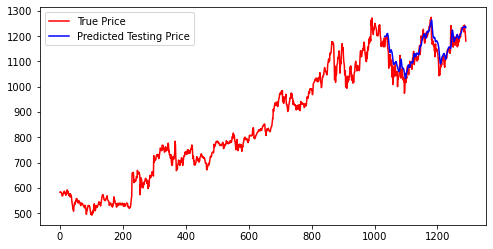

In [74]:
fig,ax= plt.subplots(figsize=(8,4))
plt.plot(df,color='red', label='True Price')
ax.plot(range(len(y_train)+50,len(y_train)+50+len(predictions)),predictions, color='blue', label='Predicted Testing Price')
plt.legend()

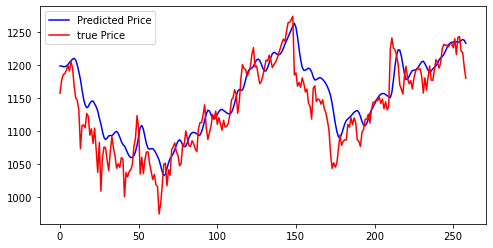

In [75]:
y_test_scaled= scaler.inverse_transform(y_test.reshape(-1,1))

fig,ax= plt.subplots(figsize=(8,4))

plt.plot(predictions,color='blue', label='Predicted Price')
ax.plot(y_test_scaled, color='red', label='true Price')
plt.legend()

In [56]:
pwd

'C:\\Users\\Zeeshan Haleem\\Downloads\\Z-Jupyter'